[View in Colaboratory](https://colab.research.google.com/github/ditiansm2015/White-wine-data-analysis/blob/master/White_Wine_EDA.ipynb)

In [46]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Exploratory Data Analysis on White Wine Dataset

This dataset ananlysis is aimed at getting a deeper insight into the data set and distribution of different factors that decide the quality of wine being produced. 

The data used is based on the wine quality dataset as recommended by Udacity. The features of the dataset are as follows , This dataset has 13 variables which contains 9 variables of ingredient, 2 variables of physical properity, 1 variable of quantity and 1 of quality. The dataset are of the size 4989 , 13. The libraries used for the data are , tidyverse and GGally. The libraries are used for visualization which can help us to come to conclusion.

## Dataset Description

The dataset is in the form of CSV file format(Comma Separated Values). CSV file is stored in the formm of tables where each row represents an independent record while each column represents an attribute. Columns of same row are separated by commas.

All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters

For more information, read [Cortez et al., 2009]. The data was last modified on October 15,2009
Following are the attributes of the dataset:

1)  fixed acidity	
2)  volatile acidity	
3)  citric acid	
4)  residual sugar	
5)  chlorides	
6)  free sulfur dioxide	
7)  total sulfur dioxide	
8)  density	
9)  pH	
10) sulphates	
11) alcohol
12) quality(ranges from 0 to 10)	

!['white wine'](https://images.crateandbarrel.com/is/image/Crate/VineyardWhiteChampagneFHF15/?$web_product_hero$&150817160041&wid=625&hei=625)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's view the first five rows of the imported Dataset. For this we use head()

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/ditiansm2015/White-wine-data-analysis/master/winequality-white.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Shape of the Dataset is:

In [19]:
df.shape

(4898, 12)

Size of the Dataset is:

In [20]:
df.size

58776

statistical analysis of the Dataset 

In [21]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Checking for NULL VALUES

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Univariate Analysis

"Uni" means one, "Variate" means variable.Thus Univariate means one variable.Hence in Univariate Analysis we focus on just one variable at a time. Univariate annalysis helps in finding out the Outliers present in the dataset.

We also tend to find the dsitribution of the data on the dataset which can further help us for the Bivaraite/Multivariate analysis.

### Quality-count plot

From the quality count plot we can say:
1. Maximum number of wines have been rated 6
2. The second hightest rating is 5.
3. Hence we may conclude that the wine tasters were not given good quality of wine to test

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


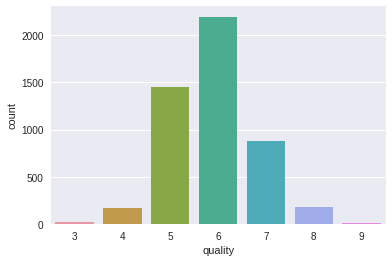

In [23]:
sns.countplot(x = 'quality', data = df)

### alcohol-count plot

From the two alcohol-count plots, we may say:
1. The curve is left skewed
2. Most of the wines have alcohol content between 9% to 10%
3. Content of alcohol are from 8.5% to 14% by volume

(array([  2.,   3.,  32., 185., 280., 343., 363., 362., 244., 272., 249.,
        240., 279., 231., 255., 297., 220., 108., 117., 158., 152., 151.,
        122.,  95.,  56.,  21.,  33.,  16.,   5.,   7.]),
 array([ 8.        ,  8.20666667,  8.41333333,  8.62      ,  8.82666667,
         9.03333333,  9.24      ,  9.44666667,  9.65333333,  9.86      ,
        10.06666667, 10.27333333, 10.48      , 10.68666667, 10.89333333,
        11.1       , 11.30666667, 11.51333333, 11.72      , 11.92666667,
        12.13333333, 12.34      , 12.54666667, 12.75333333, 12.96      ,
        13.16666667, 13.37333333, 13.58      , 13.78666667, 13.99333333,
        14.2       ]),
 <a list of 30 Patch objects>)

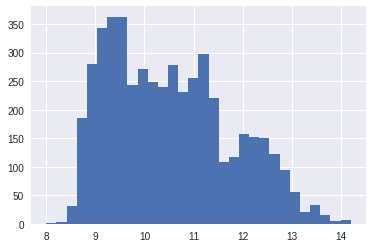

In [24]:
plt.hist(x = 'alcohol' , data = df , bins=30)

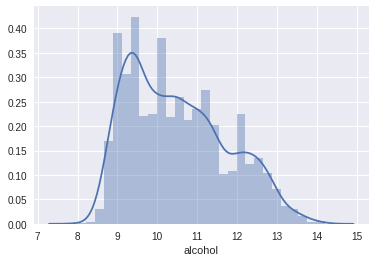

In [25]:
sns.distplot(df['alcohol'])

### sulphates - Count plot¶

Following conclusions can be drawn from the given graphs
1. Distrbution seems to be normal
2. Most of wines have sulphate content ranging between 0.4% to 0.6% by volume
3. A lot many outliers can be seen
4. The graph is left skewed

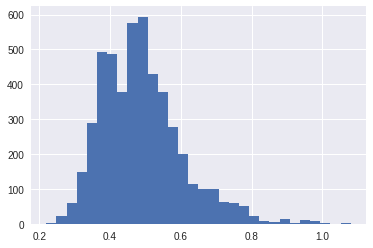

In [26]:
plt.hist(x = 'sulphates', data = df , bins = 30) 
plt.show()

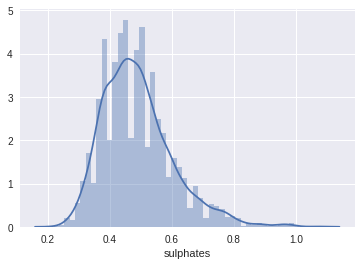

In [27]:
sns.distplot(df['sulphates'])

### pH - Count plot.¶

The plots can help us derve the following facts:
    1. The curve is normally distributed
    2. Most of the wine have approximately 3.2 as the highest pH

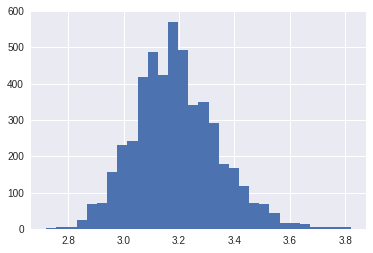

In [28]:
plt.hist(x = 'pH' , data = df , bins =30 ) 
plt.show()

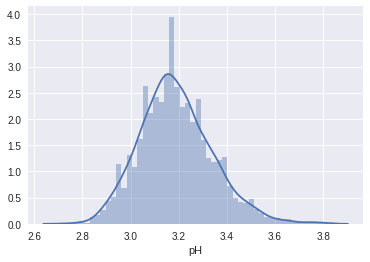

In [29]:
sns.distplot(df['pH'])

### density-count plot

The curve shows us the follwoing details:
1. The curve seems to be normal
2. A few outliers can be observed near density=1.01 and beyond
3. Maximum wines have density near to 0.99

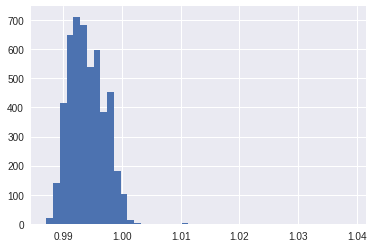

In [30]:
plt.hist(x = 'density' , data = df , bins = 45) 
plt.show()

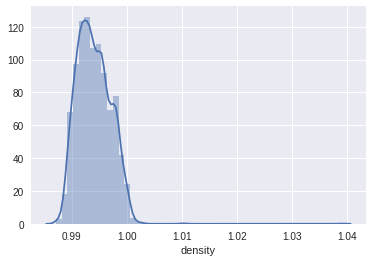

In [31]:
sns.distplot(df['density'])

### total sulfur dioxide-count plot

The distribution curve for sulfur dioxide shows the following:
1. Curve is normally distibuted
2. There are outliers
3. Most of the wines have sulfur dioxide content as approximately 100

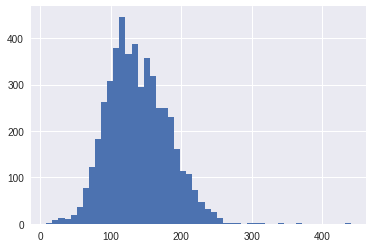

In [32]:
plt.hist(x = 'total sulfur dioxide' , data = df , bins = 50) 
plt.show()

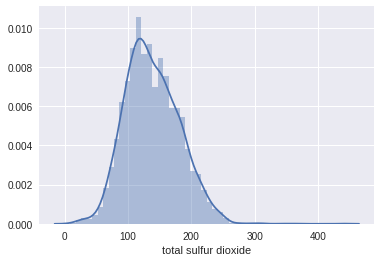

In [33]:
sns.distplot(df['total sulfur dioxide']) 

### free sulfur dioxide-count plot

The graphs shows following attributes:
1. There are a lot many outliers beyong x=100 as can be seen from distplot
2. The curve has normal distribution
3. Most of the wine has free sulfur dioxide content ranging from 20%-50%

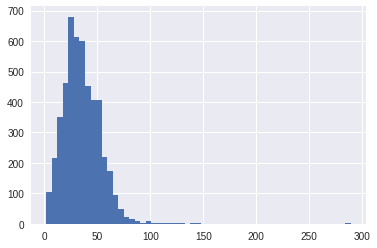

In [34]:
plt.hist(x = 'free sulfur dioxide' , data = df , bins = 55) 
plt.show()

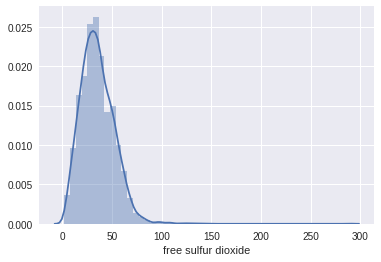

In [35]:
sns.distplot(df['free sulfur dioxide'])

### chlorides-count plot



From the chlorides count plot we can say:
1. There is normal distribution of curve
2. Most of the wine have chlorides content ranging from 120% to 160%
3. There are outliers beyond x=300

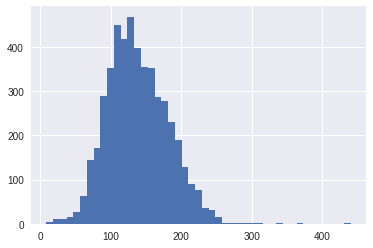

In [36]:
plt.hist(x = 'total sulfur dioxide' , data = df , bins = 45) 
plt.show()

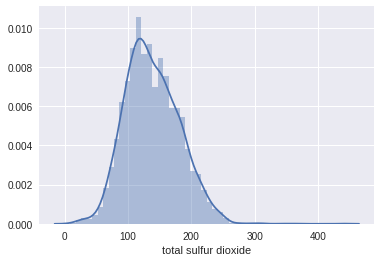

In [37]:
sns.distplot(df['total sulfur dioxide'])

### residual sugar-count plot

From the residual sugar count plot we can say:
1. The graph is left skewed
2. The graph is not normally distributed
3. Most of the wine have residual sugar content ranging from 0.1% to 1%

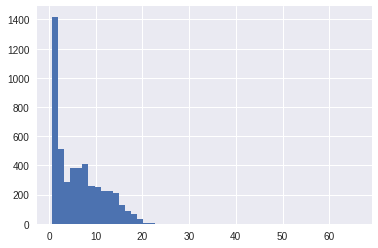

In [38]:
plt.hist(x = 'residual sugar' , data = df , bins = 50) 
plt.show()

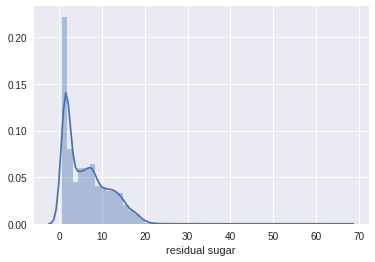

In [39]:
sns.distplot(df['residual sugar']) 


### citric acid-count plot

From the citric acid count plot we can say:
    1. There is not any skeweness 
    2. There are a lot many outlierdbeyong x=0.75

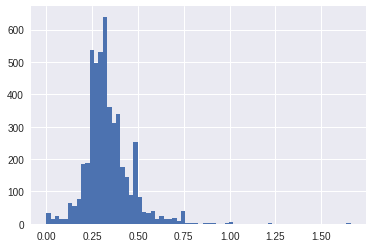

In [40]:
plt.hist(x = 'citric acid' , data = df , bins = 70) 
plt.show()

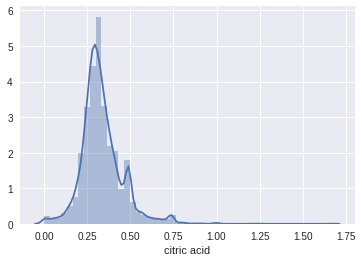

In [41]:
sns.distplot(df['citric acid'])

### volatile acidity-count plot

The distribution curve for volatile acidity shows the following:
1. The distribution is normal
2. Most of the wine has volatile acidity=0.3 
3. There are a lot many outliers

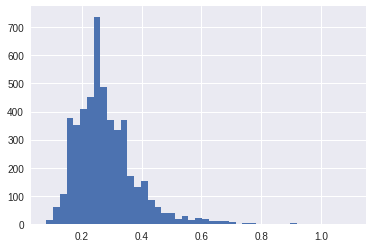

In [42]:
plt.hist(x = 'volatile acidity' , data = df , bins = 45) 
plt.show()

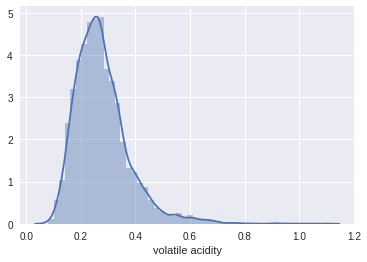

In [43]:
sns.distplot(df['volatile acidity'])

### fixed acidity-count plot

The distribution curve for fixed acidity shows the following:
1. Most of the wine have fixed acidity equal to 6.5% to 7.5%
2. The distribution seems to be normal

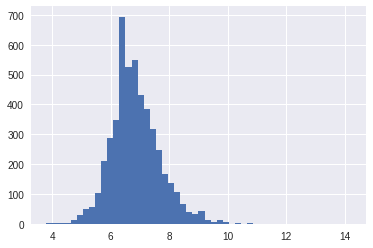

In [44]:
plt.hist(x = 'fixed acidity' , data = df , bins = 50) 
plt.show()

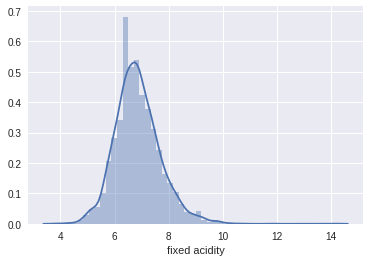

In [45]:
sns.distplot(df['fixed acidity'])